# **Q** :  Maximize the function 
\begin{equation}
2xz\exp(-x)  - 2y^3 +y^2 -3z^3
\end{equation}


fitness function interference "double fit(double p[])" where x=p[0] , y= p[1] , z= p[2]  all in range [0,100]

Quick Solution: 
* To find a maximum for univariate function we need to find slop
(derivative) and equate it to zero. We can later calculate double derivative and put those points to check wether we have Local minimum (Value >0) or Local maximum  (Value <0). 
* To find critical points for a multivariate function we need to take partial derivative with respect to all variables and set them equal to zero evaluate points for each variable.


Answers from Matlab Global Optimization ToolBox

# Maximum: 
- The number of generations was : 90
- The Values that optimizize minimum are X={0.999965} , Y={0.333364} , Z ={0.285929}
- The Function Value at Minimum is  0.177283

# Minimum: 
- The number of generations was : 92
- The Values that optimizize minimum are X={53.865788} , Y={100.000000} , Z={100.000000}
-The Function Value at minimum is -4990000

GUI TOOL:

# SLICEMATIC

<a href="https://imgbb.com/"><img src="https://i.ibb.co/vYTKj0Q/Capture.png" alt="Capture" border="0"></a>







# **Genetic Algorithms**

The idea of GA was proposed by John Holland in 1960, inspired by Darwin`s very famous Theory of Natural Selection. This is a metaheuristic using biological operators such Crossover, Mutation and Selection.

Genetic Algorithms are kind of Evolutationary Algorithms that do not provide a global optimal solution. It simply applies stratigies to guided search. It can used in problems where solution space grows faster than exponential. 
 
 GA are categorized in Global Search, Population Based and Memetic Algorithms. Inverse Pyramid Theory is the similar principle of converging to an optimal point.

## Phases of Genetic Algorithms
1. Initialize Solution 
2. Fitness Function
3. Selection
4. CrossOver
5. Mutation


In [0]:
import numpy as np
from random import randint
# defining functions as mentioned in the Phased of GA above 

def genesis(size,var, high , low):
  pop_size = (size,var) 
  new_pop = np.random.uniform(low=low,high=high,size=pop_size)
  return new_pop

def fitness(p):
      # Evaluating fitness Interference function "double fit (double p[])".
      fitness=np.zeros((len(p),1))
      for i in range(len(p)):
          x,y,z = p[i][0] , p[i][1] , p[i][2]
          fitness[i,0] = 2*x*z*np.exp(-x) - 2*y**3 + y**2 -3*z**3
      return fitness

def selection(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

#crossover has different types such as blend, one point, two points, uniform, and others
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]  
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

#There are different types of mutation such as bit flip, swap, inverse, uniform, non-uniform, Gaussian, shrink, and others
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(0, 10, 1) # 10 percent change maximum keeping 90 percent mutation rate
        i= randint(0, 2)
        offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value
    return offspring_crossover

In [32]:
import numpy as np

num_var = 3
sizeof_pop= 100000
upper_limit = 100
lower_limit = 0

num_parents = 2
population = genesis(sizeof_pop , num_var, upper_limit , lower_limit)
print(population)

Scores=[]
num_generations = 50
for generation in range(num_generations):
  print("\n\nGeneration : ", generation)
  fitness_score = fitness(population)
  parents = selection(population, fitness_score, num_parents)
  print("Best Parents \n",parents)
  offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
  offspring_mutation = mutation(offspring_crossover)
  print("Mutated OffSprings\n",offspring_mutation)
  population[0:parents.shape[0], :] = parents
  population[parents.shape[0]:6, :] = offspring_mutation
  Scores.append(np.max(fitness_score))
  print("Best result : ", np.max(fitness_score))

[[31.09366226  0.20242468 10.69265745]
 [81.44636933 97.79272298 90.40023159]
 [82.90297886 94.22089774 91.72799687]
 ...
 [61.94741901 52.13007215 99.11684177]
 [ 3.32180139 93.77801336  7.44910607]
 [93.13324872 14.25708688 75.77072984]]


Generation :  0
Best Parents 
 [[5.12895479e+01 3.81632734e-01 5.03554412e-02]
 [8.01346639e+01 3.82739695e-01 2.71224580e-01]]
Mutated OffSprings
 [[5.12895479e+01 7.84686165e+00 2.71224580e-01]
 [8.01346639e+01 6.16058327e-01 5.03554412e-02]
 [5.72034925e+01 3.82739695e-01 2.71224580e-01]
 [8.01346639e+01 3.81632734e-01 7.37752674e+00]]
Best result :  -0.139040244571036


Generation :  1
Best Parents 
 [[5.12895479e+01 3.81632734e-01 5.03554412e-02]
 [5.12895479e+01 3.81632734e-01 5.03554412e-02]]
Mutated OffSprings
 [[5.12895479e+01 8.77247562e+00 5.03554412e-02]
 [5.76380399e+01 3.81632734e-01 5.03554412e-02]
 [5.12895479e+01 3.36920884e+00 5.03554412e-02]
 [5.12895479e+01 3.22414702e+00 5.03554412e-02]]
Best result :  -0.025501248579159946


G

In [33]:
fitness = fitness(population)
best_match_idx = np.where(fitness == np.max(fitness))
print("P : ", population[best_match_idx, :][0][0])
print(" Value for  x= {}".format(population[best_match_idx, :][0][0][0]))
print(" Value for  y= {}".format(population[best_match_idx, :][0][0][1]))
print(" Value for  z= {}".format(population[best_match_idx, :][0][0][2]))
print("Best solution fitness : ", fitness[best_match_idx][0])

P :  [5.12895479e+01 3.81632734e-01 5.03554412e-02]
 Value for  x= 51.289547917641265
 Value for  y= 0.3816327338331149
 Value for  z= 0.05035544120978175
Best solution fitness :  0.034095801751461076


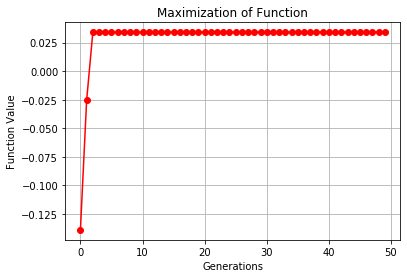

In [57]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()


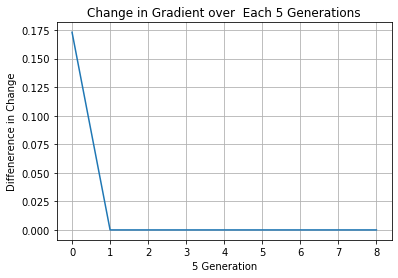

In [56]:
diff_Evaluation= []
for ind in range(0,len(Evaluations)-5,5):
  diff_Evaluation.append(Evaluations[ind+5]-Evaluations[ind])
plt.plot(diff_Evaluation)
plt.grid(True)
plt.title("Change in Gradient over  Each 5 Generations")
plt.xlabel("5 Generation")
plt.ylabel("Diffenerence in Change")
plt.show()

In [54]:
diff_Evaluation


[0.17313604632249707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]